# Interpolación Numérica:

## ¿Qué es?

La interpolación es el método por el que podemos obtener nuevos puntos a partir de un conjunto de datos previos, ajustándolos a una función o a una tabla de valores. Los puntos que se interpolen deben de estar en el intervalo del que se tienen los datos de los extremos. Su importancia radica en que muchos de los métodos numéricos que se implementan tienen sus bases en la interpolación.

## ¿Cuál es su solución?

La interpolación de datos se soluciona cuando determinamos el polinomio de la función que se ajusta a los puntos, para esto existen múltiples métodos como:
   * [Interpolación Lineal](#paragraph1)
   * Newton hacia Adelante
   * Newton hacia Atrás
   * Newton con Diferencias Divididas
   * Lagrange

In [3]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import sys
from scipy.interpolate import lagrange
from IPython.display import Math,display


## Lineal <a name="paragraph1"></a> :

### ¿Cómo funciona?

La interpolación lineal trata de unir dos puntos con una línea recta, usando el concepto de la primera derivada de una función. Su fórmula es $g(x) = \dfrac{f(b)-f(a)}{b-a} (x-a) + f(a)$

Cuanto menor sea el intervalo entre los datos, mejor será el resultado de la aproximación de la función de la recta.
### ¿Cómo lo puedo usar?

Para usar este método, hay que ejecutar la **celda** de código siguiente e ingresar dos valores $a$ y $b$, posteriormente hay que ingresar los valores encontrados en $f(a)$ y $f(b)$ y por último el valor de $x$ que se quiere interpolar. Debajo de la **celda** actual de código se encuentra una celda para poder graficar el resultado de la interpolación.

In [6]:
arr_x_lineal = []
arr_x_lineal.append(float(input("Ingrese el valor de a: ")))
arr_x_lineal.append(float(input("Ingrese el valor de b: ")))
arr_x_lineal = np.array(arr_x_lineal)

arr_y_lineal = []
arr_y_lineal.append(float(input("\nIngrese el valor de f(a): ")))
arr_y_lineal.append(float(input("Ingrese el valor de (b): ")))
arr_y_lineal = np.array(arr_y_lineal)

x_interpolar_lineal = float(input("\nIngrese el valor de x a interpolar en g(x): "))

interp_lineal = np.interp(x_interpolar_lineal, arr_x_lineal, arr_y_lineal)
print("\nEl valor de la interpolación lineal de g(x) es: ", interp_lineal)

Ingrese el valor de a:  5
Ingrese el valor de b:  2

Ingrese el valor de f(a):  3
Ingrese el valor de (b):  2

Ingrese el valor de x a interpolar en g(x):  6



El valor de la interpolación lineal de g(x) es:  2.0


### Graficar interpolación

Para graficar el resultado es necesario haber corrido la **celda** anterior de código, no se necesitan datos de entrada.

Generando gráfica de la interpolación


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
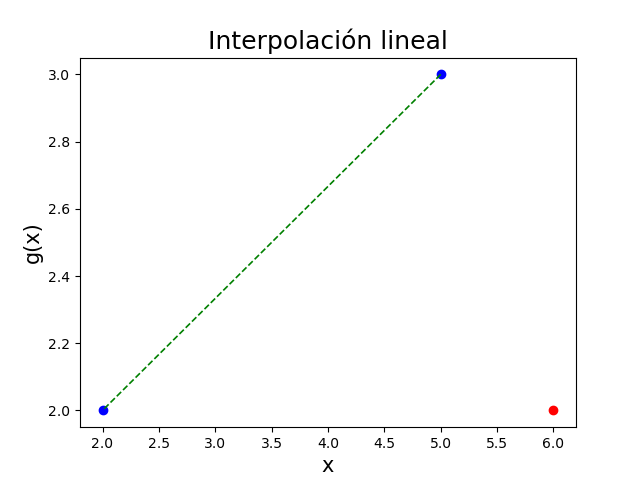

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
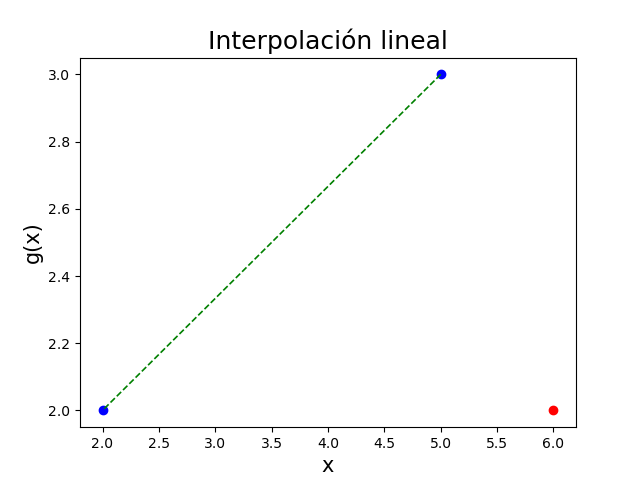

In [7]:
#plotear
print("Generando gráfica de la interpolación")
fig1,ax1 = plt.subplots()
plot_x_lineal = np.linspace(arr_x_lineal[0], arr_x_lineal[1], 2, endpoint=True)
plot_y_lineal = np.linspace(arr_y_lineal[0], arr_y_lineal[1], 2, endpoint=True)
ax1.plot(plot_x_lineal,plot_y_lineal,'bo') #blue o
ax1.plot(x_interpolar_lineal, interp_lineal, 'ro') # red o
ax1.plot(plot_x_lineal,plot_y_lineal, color='green', linestyle='dashed',linewidth=1.2)
ax1.set_title('Interpolación lineal', fontsize=18)
ax1.set_xlabel('x', fontsize=15)
ax1.set_ylabel('g(x)', fontsize=15)
fig1.show();

## Newton hacia adelante:

In [24]:
def u_cal(u, n): 
  
    temp = u; 
    for i in range(1, n): 
        temp = temp * (u - i); 
    return temp; 
  
def fact(n): 
    f = 1; 
    for i in range(2, n + 1): 
        f *= i; 
    return f; 

n_nwt_delante=int(input("Ingrese el número de datos: "))
arr_x_nwt_delante = []
arr_y_nwt_delante = []
for a in range(1,n_nwt_delante+1):
    arr_x_nwt_delante.append(float(input("Ingrese el valor de x"+str(a)+": ")))
    arr_y_nwt_delante.append(float(input("Ingrese el valor de y"+str(a)+": ")))

dif_nwt_delante = arr_x_nwt_delante[1] - arr_x_nwt_delante[0]
dif_temp_nwt_delante = 0
check_nwt_delante = True
for x_nwt_delante in range(1, len(arr_x_nwt_delante)-1):
    dif_temp_nwt_delante = arr_x_nwt_delante[x_nwt_delante+1] - arr_x_nwt_delante[x_nwt_delante]
    if dif_temp_nwt_delante != dif_nwt_delante:
        print("Los contenidos no son uniformes")
        check_nwt_delante = False
        break
    else:
        arr_x_nwt_delante = np.asarray(arr_x_nwt_delante)
        arr_y_nwt_delante=np.asarray(arr_y_nwt_delante)
        x_nwt_delante = arr_x_nwt_delante
        y_nwt_delante = [[0 for i in range(n_nwt_delante)] for j in range(n_nwt_delante)]

        for a in range(len(arr_y_nwt_delante)):
            y_nwt_delante[a][0] = arr_y_nwt_delante[a]

        for i in range(1, n_nwt_delante): 
            for j in range(n_nwt_delante - i): 
                y_nwt_delante[j][i] = y_nwt_delante[j + 1][i - 1] - y_nwt_delante[j][i - 1]; 

        print("Imprimiendo coeficientes:\n")
        for i in range(n_nwt_delante): 
            print(x_nwt_delante[i], end = "\t") 
            for j in range(n_nwt_delante - i): 
                print(y_nwt_delante[i][j], end = "\t"); 
            print("") 
        x_interp_nwt_delante = float(input("\nIngrese el valor a interpolar en g(x): "))
        sum_nwt_delante = y_nwt_delante[0][0]; 
        u = (x_interp_nwt_delante - x_nwt_delante[0]) / (x_nwt_delante[1] - x_nwt_delante[0]); 
        for i in range(1,n_nwt_delante): 
            sum_nwt_delante = sum_nwt_delante + (u_cal(u, i) * y_nwt_delante[0][i]) / fact(i); 

        print("\nEl valor de la interpolación de Newton hacia adelante en g(x) es: " + str(sum_nwt_delante)) 

Ingrese el número de datos:  2
Ingrese el valor de x1:  3
Ingrese el valor de y1:  4
Ingrese el valor de x2:  5
Ingrese el valor de y2:  21


### Graficar interpolación

Generando gráfica de la interpolación


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
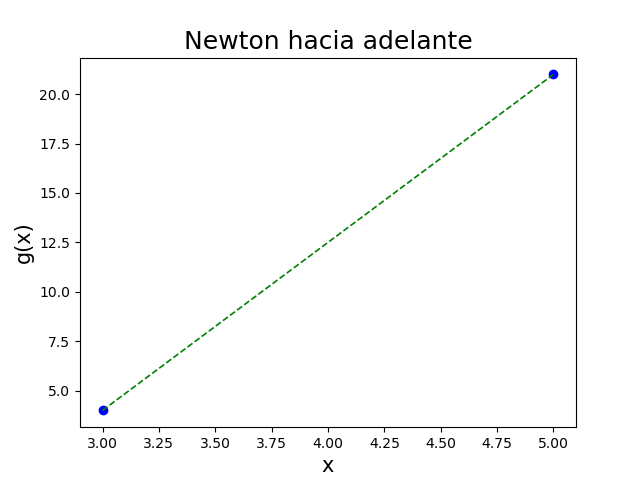

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
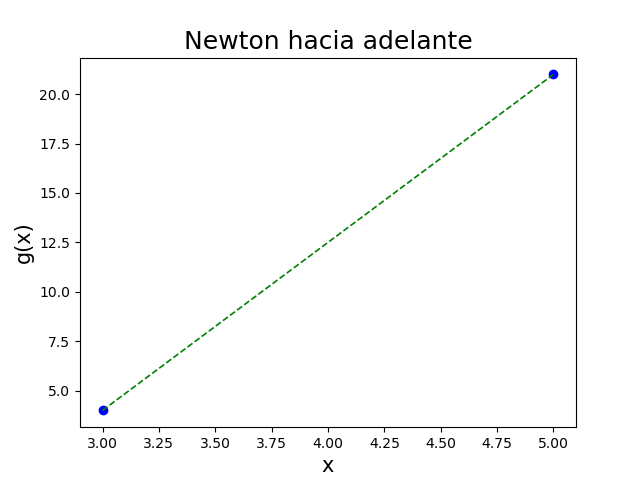

In [25]:
if check_nwt_delante:
    print("Generando gráfica de la interpolación")
    fig2,ax2 = plt.subplots()
    ax2.plot(arr_x_nwt_delante,arr_y_nwt_delante,'bo') #blue o
    ax2.plot(x_interp_nwt_delante, sum_nwt_delante, 'ro') # red o
    ax2.plot(arr_x_nwt_delante,arr_y_nwt_delante, color='green', linestyle='dashed',linewidth=1.2)
    ax2.set_title('Newton hacia adelante', fontsize=18)
    ax2.set_xlabel('x', fontsize=15)
    ax2.set_ylabel('g(x)', fontsize=15)
    fig2.show();
else:
    print("No se puede generar la gráfica")

## Newton hacia atrás

In [17]:
def u_cal(u, n):

    temp = u
    for i in range(1, n):
        temp = temp * (u + i)
    return temp


def fact(n):
    f = 1
    for i in range(2, n + 1):
        f *= i
    return f


n_nwt_atras = int(input("Ingrese el número de datos: "))
arr_x_nwt_atras = []
arr_y_nwt_atras = []
for a in range(1, n_nwt_atras+1):
    arr_x_nwt_atras.append(float(input("Ingrese el valor de x"+str(a)+": ")))
    arr_y_nwt_atras.append(float(input("Ingrese el valor de y"+str(a)+": ")))

dif_nwt_atras = arr_x_nwt_atras[1] - arr_x_nwt_atras[0]
dif_temp_nwt_atras = 0
check_nwt_atras = True
for x_nwt_atras in range(1, len(arr_x_nwt_atras)-1):
    dif_temp_nwt_atras = arr_x_nwt_atras[x_nwt_atras+1] - arr_x_nwt_atras[x_nwt_atras]
    if dif_temp_nwt_atras != dif_nwt_atras:
        print("Los contenidos no son uniformes")
        check_nwt_atras = False
        break
        sys.exit
arr_x_nwt_atras = np.asarray(arr_x_nwt_atras)
arr_y_nwt_atras = np.asarray(arr_y_nwt_atras)
x_nwt_atras = arr_x_nwt_atras
y_nwt_atras = [[0 for i in range(n_nwt_atras)] for j in range(n_nwt_atras)]

for a in range(len(arr_y_nwt_atras)):
    y_nwt_atras[a][0] = arr_y_nwt_atras[a]

for i in range(1, n_nwt_atras):
    for j in range(n_nwt_atras-1, i-1, -1):
        y_nwt_atras[j][i] = y_nwt_atras[j][i - 1] - y_nwt_atras[j - 1][i - 1]

print("Imprimiendo coeficientes:\n")
for i in range(0, n_nwt_atras):
    print(x_nwt_atras[i], end="\t")
    for j in range(0, i+1):
        print(y_nwt_atras[i][j], end="\t")
    print("")
x_interp_nwt_atras = float(input("\nIngrese el valor a interpolar en g(x): "))
sum_nwt_atras = y_nwt_atras[n_nwt_atras-1][0]
u = (x_interp_nwt_atras - x_nwt_atras[n_nwt_atras-1]) / (x_nwt_atras[1] - x_nwt_atras[0])
for i in range(1, n_nwt_atras):
    sum_nwt_atras = sum_nwt_atras + (u_cal(u, i) * y_nwt_atras[n_nwt_atras-1][i]) / fact(i)

print("\nEl valor de la interpolación de Newton hacia atrás en g(x) es: " + str(sum_nwt_atras))

Ingrese el número de datos:  2
Ingrese el valor de x1:  1
Ingrese el valor de y1:  2
Ingrese el valor de x2:  3
Ingrese el valor de y2:  5


Imprimiendo coeficientes:

1.0	2.0	
3.0	5.0	3.0	



Ingrese el valor a interpolar en g(x):  6



El valor de la interpolación de Newton hacia atrás en g(x) es: 9.5


### Graficar interpolación

In [7]:
if check_nwt_atras:
    print("Generando gráfica de la interpolación")
    fig3,ax3 = plt.subplots()
    ax3.plot(arr_x_nwt_atras, arr_y_nwt_atras, 'bo')  # blue o
    ax3.plot(x_interp_nwt_atras, sum_nwt_atras, 'ro')  # red o
    ax3.plot(arr_x_nwt_atras, arr_y_nwt_atras, color='green',
             linestyle='dashed', linewidth=1.2)
    ax3.set_title('Newton hacia atrás', fontsize=18)
    ax3.set_xlabel('x', fontsize=15)
    ax3.set_ylabel('g(x)', fontsize=15)
    fig3.show();
else:
    print("No se puede generar la gráfica")

No se puede generar la gráfica


## Newton con Diferencias Divididas

In [27]:
 def proterm(i, value, x):
    pro = 1
    for j in range(i):
        pro = pro * (value - x[j])
    return pro


def tablaDiferencias(x, y, n):

    for i in range(1, n):
        for j in range(n - i):
            y[j][i] = ((y[j][i - 1] - y[j + 1][i - 1]) /
                       (x[j] - x[i + j]))
    return y


def aplicarFormula(value, x, y, n):

    sum = y[0][0]

    for i in range(1, n):
        sum = sum + (proterm(i, value, x) * y[0][i])

    return sum


def imprimirTabla(y, n):

    for i in range(n):
        for j in range(n - i):
            print(round(y[i][j], 4), "\t",
                  end=" ")

        print("")


n_nwt_dd = int(input("Ingrese el número de datos: "))
arr_x_nwt_dd = []
arr_y_nwt_dd = []
for a in range(1, n_nwt_dd+1):
    arr_x_nwt_dd.append(float(input("Ingrese el valor de x"+str(a)+": ")))
    arr_y_nwt_dd.append(float(input("Ingrese el valor de y"+str(a)+": ")))

arr_x_nwt_dd = np.asarray(arr_x_nwt_dd)
arr_y_nwt_dd = np.asarray(arr_y_nwt_dd)
x_nwt_dd = arr_x_nwt_dd
y_nwt_dd = [[0 for i in range(n_nwt_dd)] for j in range(n_nwt_dd)]

for a in range(len(arr_y_nwt_dd)):
    y_nwt_dd[a][0] = arr_y_nwt_dd[a]

y_nwt_dd = tablaDiferencias(x_nwt_dd, y_nwt_dd, n_nwt_dd)

print("Imprimiendo tabla de diferencias:\n")
imprimirTabla(y_nwt_dd, n_nwt_dd)

x_interp_nwt_dd = float(input("\nIngrese el valor a interpolar en g(x): "))

interp_nwt_dd = aplicarFormula(x_interp_nwt_dd, x_nwt_dd, y_nwt_dd, n_nwt_dd)
print("\nEl valor de la interpolación de Newton con Diferencias Divididas en g(x) es: " + str(interp_nwt_dd))

Ingrese el número de datos:  2
Ingrese el valor de x1:  1
Ingrese el valor de y1:  5
Ingrese el valor de x2:  3
Ingrese el valor de y2:  1


Imprimiendo tabla de diferencias:

5.0 	 -2.0 	 
1.0 	 



Ingrese el valor a interpolar en g(x):  3



El valor de la interpolación de Newton con Diferencias Divididas en g(x) es: 1.0


### Graficar interpolación

Generando gráfica de la interpolación


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
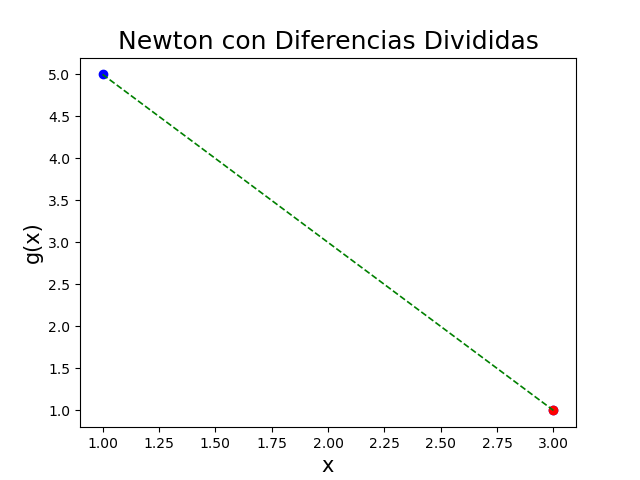

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
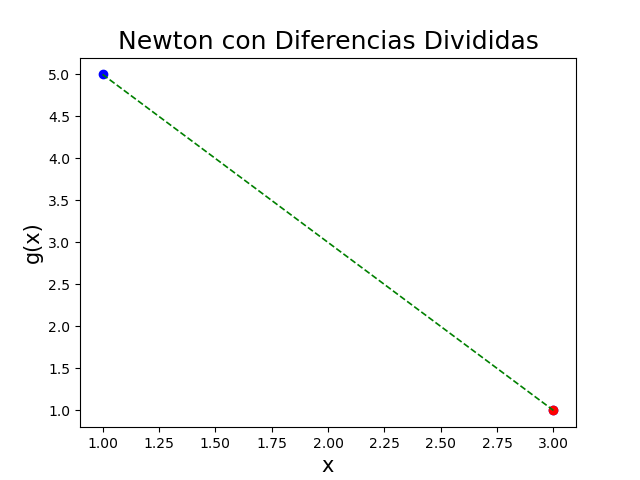

In [29]:
print("Generando gráfica de la interpolación")
fig4,ax4 = plt.subplots()
ax4.plot(arr_x_nwt_dd, arr_y_nwt_dd, 'bo')  # blue o
ax4.plot(x_interp_nwt_dd, interp_nwt_dd, 'ro')  # red o
ax4.plot(arr_x_nwt_dd, arr_y_nwt_dd, color='green', linestyle='dashed', linewidth=1.2)
ax4.set_title('Newton con Diferencias Divididas', fontsize=18)
ax4.set_xlabel('x', fontsize=15)
ax4.set_ylabel('g(x)', fontsize=15)
fig4.show();

## Lagrange

In [31]:
n_lagrange = int(input("Ingrese el número de datos: "))
arr_x_lagrange = []
arr_y_lagrange = []
for a in range(1, n_lagrange+1):
    arr_x_lagrange.append(float(input("Ingrese el valor de x"+str(a)+": ")))
    arr_y_lagrange.append(float(input("Ingrese el valor de y"+str(a)+": ")))

arr_x_lagrange = np.asarray(arr_x_lagrange)
arr_y_lagrange = np.asarray(arr_y_lagrange)
x_lagrange = arr_x_lagrange
y_lagrange = arr_y_lagrange
x_interp_lagrange = float(input("\nIngrese el valor a interpolar en g(x): "))

poly = lagrange(x_lagrange, y_lagrange)
print(poly)
y_interp_lagrange = poly(x_interp_lagrange)

print("\nEl valor de la interpolación de Lagrange en g(x) es: ", y_interp_lagrange)

Ingrese el número de datos:  2
Ingrese el valor de x1:  4
Ingrese el valor de y1:  3
Ingrese el valor de x2:  1
Ingrese el valor de y2:  5

Ingrese el valor a interpolar en g(x):  2


 
-0.6667 x + 5.667

El valor de la interpolación de Lagrange en g(x) es:  4.333333333333333


### Graficar interpolación

Generando gráfica de la interpolación


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
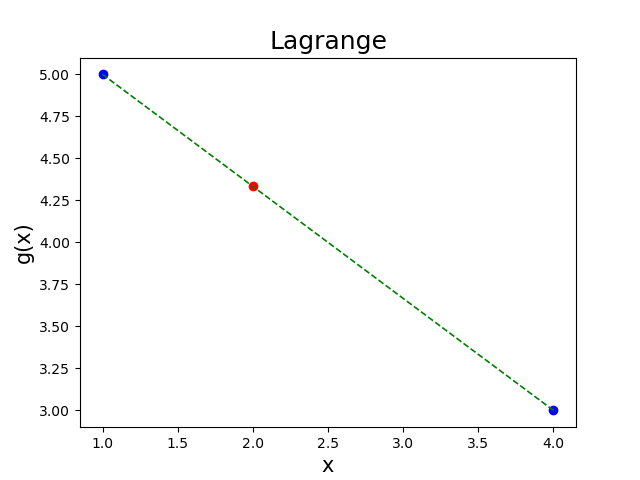

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
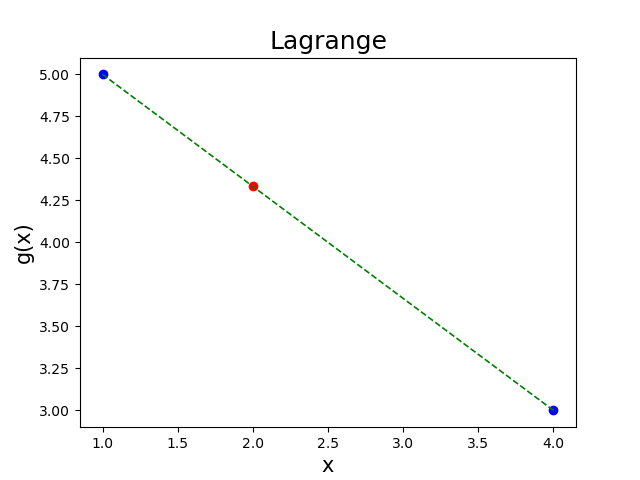

In [33]:
print("Generando gráfica de la interpolación")
fig5,ax5 = plt.subplots()
ax5.plot(arr_x_lagrange, arr_y_lagrange, 'bo')  # blue o
ax5.plot(x_interp_lagrange, y_interp_lagrange, 'ro')  # red o
ax5.plot(arr_x_lagrange, arr_y_lagrange, color='green',
         linestyle='dashed', linewidth=1.2)
ax5.set_title('Lagrange', fontsize=18)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('g(x)', fontsize=15)
fig5.show()

## Interpolar de manera general

In [34]:
def u_cal(u, n): 
  
    temp = u; 
    for i in range(1, n): 
        temp = temp * (u - i); 
    return temp; 
  
def fact(n): 
    f = 1; 
    for i in range(2, n + 1): 
        f *= i; 
    return f; 

n_general = int(input("Ingrese el número de datos: "))
arr_x_general = []
arr_y_general = []
for a in range(1, n_general+1):
    arr_x_general.append(float(input("Ingrese el valor de x"+str(a)+": ")))
    arr_y_general.append(float(input("Ingrese el valor de y"+str(a)+": ")))

dif_general = arr_x_general[1] - arr_x_general[0]
dif_temp_general = 0
for x in range(1, len(arr_x_general)-1):
    dif_temp_general = arr_x_general[x+1] - arr_x_general[x]
    if dif_temp_general != dif_general:
        print("Los contenidos no son uniformes, usando Interpolación de Lagrange")
        arr_x_lagrange = np.asarray(arr_x_general)
        arr_y_lagrange = np.asarray(arr_y_general)
        x_lagrange = arr_x_lagrange
        y_lagrange = arr_y_lagrange
        x_interp_lagrange = float(
            input("\nIngrese el valor a interpolar en g(x): "))
        poly = lagrange(x_lagrange, y_lagrange)
        print(poly)
        y_interp_lagrange = poly(x_interp_lagrange)
        print("\nEl valor de la interpolación de Lagrange en g(x) es: ",
              y_interp_lagrange)
        print("Generando gráfica de la interpolación")
        fig6,ax6 = plt.subplots()
        ax6.plot(arr_x_lagrange, arr_y_lagrange, 'bo')  # blue o
        ax6.plot(x_interp_lagrange, y_interp_lagrange, 'ro')  # red o
        ax6.plot(arr_x_lagrange, arr_y_lagrange, color='green',
                 linestyle='dashed', linewidth=1.2)
        ax6.set_title('Lagrange', fontsize=18)
        ax6.set_xlabel('x', fontsize=15)
        ax6.set_ylabel('g(x)', fontsize=15)
        fig6.show();
        exit
    else:
        print("Los contenidos son uniformes, usando Interpolación de Newton hacia adelante")
        arr_x_nwt_delante = np.asarray(arr_x_general)
        arr_y_nwt_delante = np.asarray(arr_y_general)
        x_nwt_delante = arr_x_nwt_delante
        n_nwt_delante = n_general
        y_nwt_delante = [[0 for i in range(n_nwt_delante)]
                         for j in range(n_nwt_delante)]

        for a in range(len(arr_y_nwt_delante)):
            y_nwt_delante[a][0] = arr_y_nwt_delante[a]

        for i in range(1, n_nwt_delante):
            for j in range(n_nwt_delante - i):
                y_nwt_delante[j][i] = y_nwt_delante[j +
                                                    1][i - 1] - y_nwt_delante[j][i - 1]

        print("Imprimiendo coeficientes:\n")
        for i in range(n_nwt_delante):
            print(x_nwt_delante[i], end="\t")
            for j in range(n_nwt_delante - i):
                print(y_nwt_delante[i][j], end="\t")
            print("")
        x_interp_nwt_delante = float(
            input("\nIngrese el valor a interpolar en g(x): "))
        sum_nwt_delante = y_nwt_delante[0][0]
        u = (x_interp_nwt_delante -
             x_nwt_delante[0]) / (x_nwt_delante[1] - x_nwt_delante[0])
        for i in range(1, n_nwt_delante):
            sum_nwt_delante = sum_nwt_delante + \
                (u_cal(u, i) * y_nwt_delante[0][i]) / fact(i)

        print("\nEl valor de la interpolación de Newton hacia adelante en g(x) es: " +
              str(sum_nwt_delante))
        print("Generando gráfica de la interpolación")
        fig7,ax7 = plt.subplots()
        ax7.plot(arr_x_nwt_delante, arr_y_nwt_delante, 'bo')  # blue o
        ax7.plot(x_interp_nwt_delante, sum_nwt_delante, 'ro')  # red o
        ax7.plot(arr_x_nwt_delante, arr_y_nwt_delante,
                 color='green', linestyle='dashed', linewidth=1.2)
        ax7.set_title('Newton hacia adelante', fontsize=18)
        ax7.set_xlabel('x', fontsize=15)
        ax7.set_ylabel('g(x)', fontsize=15)
        fig7.show();
        exit


Ingrese el número de datos:  2
Ingrese el valor de x1:  4
Ingrese el valor de y1:  2
Ingrese el valor de x2:  3
Ingrese el valor de y2:  5
